# House prices with DNN - Kaggle
Angel Martinez-Tenor <br/>
Introduction to Machine Learning - Udacity <br/>
June 2017 <br/>

### Dataset

Description on the [Kaggle website](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and prepare the data

In [2]:
train_data_path = 'H_house_prices_data.csv'

df = pd.read_csv(train_data_path)

print(list(df))
df.head()

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
print(df["Alley"].unique())
print(df["BsmtQual"].unique())
# df = df[['SalePrice','MSSubClass','MSZoning','LotArea','Utilities',
#         'Neighborhood','OverallQual','OverallCond','YearBuilt',
#         'Functional','PoolQC','MiscVal']]

[nan 'Grvl' 'Pave']
['Gd' 'TA' 'Ex' nan 'Fa']


In [4]:
targets = ['SalePrice']
features = [field for field in df if field not in targets]

df = df[features + targets]

# # convert dataframe values to numerical
# df = df.apply(pd.to_numeric, errors='coerce')

categorical = [feat for feat in features if df[feat].dtype == 'object']
numerical = [feat for feat in features if df[feat].dtype != 'object']

# Reeplace NaN values
df.fillna(df[numerical].mean(), inplace=True)  # NaN from numerical feature replaced by mean
df = df.replace(np.nan, 'No Data', regex=True)  # NaN from categorical feature remplazed by 'No Data'

#df[numerical].dtypes

### Visualize data

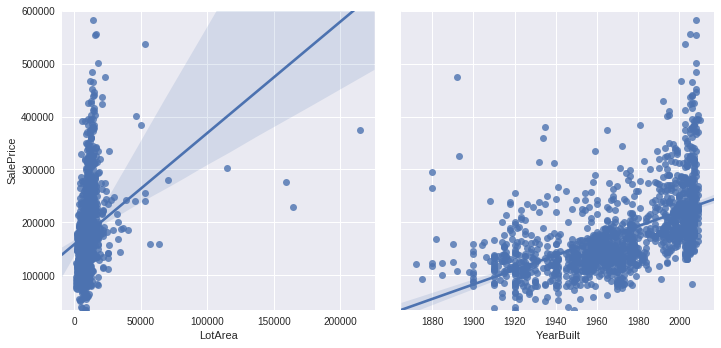

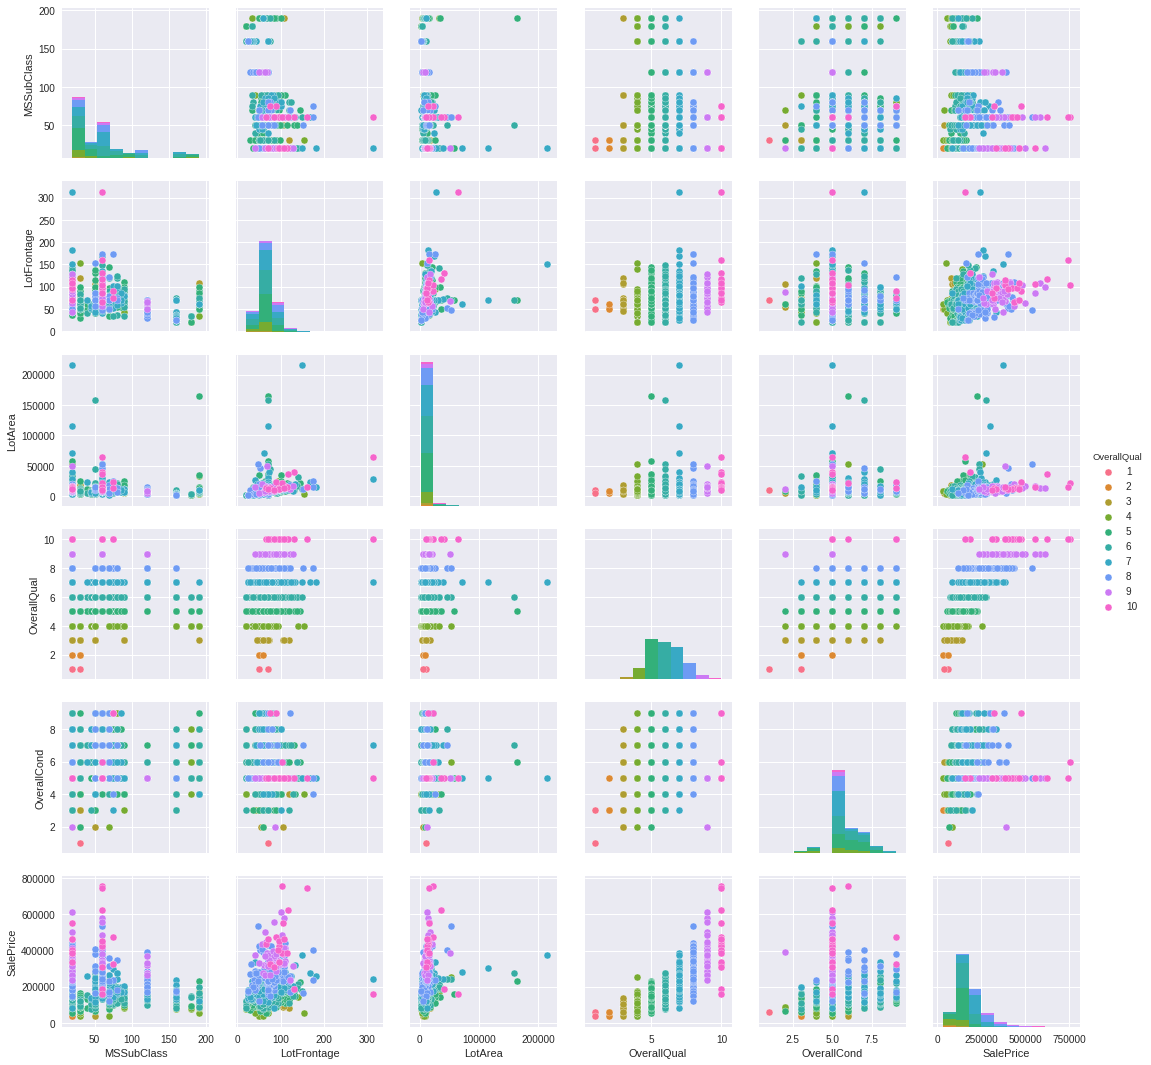

In [5]:
# sns.barplot(x='Sex',y='Survived', data=df[:n_train])
# sns.FacetGrid(df[:n_train], col="Sex",hue="Survived").map(plt.hist, "Age", alpha=.7).add_legend();

g = sns.PairGrid(df, y_vars=["SalePrice"], x_vars=["LotArea", "YearBuilt"], size=5)
g.map(sns.regplot)
#plt.legend()
plt.ylim(df['SalePrice'].min(), 600000)

sns.pairplot(df, hue = 'OverallQual', vars=numerical[1:6] + targets)

### Dummy variables

In [6]:
dummy_fields = categorical

# Process categorical variables 
dummy_fields = [d for d in dummy_fields if d in df]
for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
#df = df.join(dummies)
df = df.drop(dummy_fields, axis='columns')
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


### Scaling target variables
The scaling factors are saved so we can go backwards when we use the network for predictions.

In [7]:
quant_features = numerical

# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for f in quant_features:
    mean, std = df[f].mean(), df[f].std()
    scaled_features[f] = [mean, std]
    df.loc[:, f] = (df[f] - mean)/std

scaled_targets = {}
for f in targets:
    mean, std = df[f].mean(), df[f].std()
    scaled_targets[f] = [mean, std]
    df.loc[:, f] = (df[f] - mean)/std    
    
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.730272,0.073350,-0.229293,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.511243,0.575228,...,0,0,0,1,0,0,0,0,1,0
1,-1.727900,-0.872264,0.451781,-0.091855,-0.071812,2.178881,0.156680,-0.429430,-0.574214,1.171591,...,0,0,0,1,0,0,0,0,1,0
2,-1.725528,0.073350,-0.093078,0.073455,0.651256,-0.517023,0.984415,0.829930,0.322950,0.092875,...,0,0,0,1,0,0,0,0,1,0
3,-1.723156,0.309753,-0.456318,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.574214,-0.499103,...,0,0,0,1,1,0,0,0,0,0
4,-1.720785,0.073350,0.633401,0.375020,1.374324,-0.517023,0.951306,0.733056,1.364102,0.463410,...,0,0,0,1,0,0,0,0,1,0


### Tune features selection

In [8]:
fields_to_drop = []
data = df.drop(fields_to_drop, axis=1)

# filtered dataset now in 'data'

### Splitting the data into training, testing, and validation sets

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data,  test_size=0.2, random_state=9)

# Separate the data into features and targets (x=features, y=targets)
x_train, y_train = train.drop(targets, axis=1).values, train[targets].values
x_test, y_test = test.drop(targets, axis=1).values, test[targets].values
# _nc: non-categorical yet 
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1068,0.802875,2.437384,-1.273607,-0.656513,-0.071812,-1.415657,0.057352,-0.574741,-0.574214,0.862447,...,0,0,0,1,0,0,0,0,1,0
271,-1.087498,-0.872264,0.133947,2.864083,0.651256,1.280247,-0.571727,0.975241,-0.574214,-0.477177,...,0,0,0,1,0,0,0,0,1,0
39,-1.637769,0.782560,-0.229293,-0.448523,-1.517947,-0.517023,-0.538617,-1.446605,-0.574214,-0.972685,...,0,0,0,1,0,1,0,0,0,0
775,0.107920,1.491770,-1.727657,-0.602812,-0.071812,-0.517023,0.885087,0.636183,1.197961,0.926029,...,0,0,0,1,0,0,0,0,1,0
247,-1.144423,-0.872264,0.224756,0.079466,-0.071812,-0.517023,-0.571727,-1.495042,-0.574214,-0.972685,...,0,0,0,1,0,0,0,0,1,0


### Target

## Deep Neural Network
  

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 152)               46512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 152)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 153       
Total params: 46,665.0
Trainable params: 46,665.0
Non-trainable params: 0.0
_________________________________________________________________
Training ....
Epoch 00057: early stopping
Training: loss: 0.113 ... Validation: loss: 0.237


(0, 1)

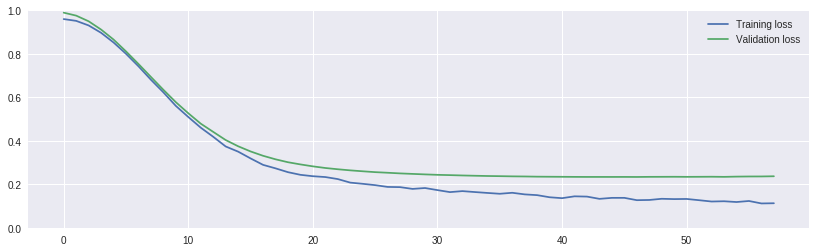

In [10]:
np.random.seed(9)
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
keras.optimizers.Adam
#from keras.layers.advanced_activations import LeakyReLU

nodes = x_train.shape[1]

weights = keras.initializers.RandomNormal(stddev=0.0001)

model = Sequential()
model.add(Dense(nodes//2, input_dim=x_train.shape[1], activation='relu',
               kernel_initializer=weights,
               bias_initializer = weights))
model.add(Dropout(.3))

model.add(Dense(1, activation=None,
               kernel_initializer = weights,
               bias_initializer = weights))


#opt = keras.optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
opt = keras.optimizers.adam(lr=0.00002)

model.compile(loss='mean_squared_error', optimizer=opt)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)]

print('Training ....')

history = model.fit(x_train, y_train, epochs=10000, batch_size=16, verbose=0, 
                    validation_split=0.33, callbacks=callbacks)

print("Training: loss: {:.3f} ... Validation: loss: {:.3f}".format(
    history.history['loss'][-1], history.history['val_loss'][-1]))
# print("Accuracy: loss: {:.3f} ... Validation Accuracy: {:.3f}".format(
#     history.history['acc'][-1], history.history['val_acc'][-1]))

plt.figure(figsize=(14, 4))

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.ylim(ymin=0, ymax=1)

## Predicting the test features

In [11]:
score = model.evaluate(x_test, y_test, verbose=1)
print("\n Test loss: {:.4f}".format(score))

 32/292 [==>...........................] - ETA: 0s
 Test loss: 0.1756
